#  IMAGE CLASSIFICATION USING CONVOLUTIONAL NEURAL NETWORK
<img src='image.png' style="float:center;width:500px;">

# Project Description
The MNIST data is a popular dataset in the image recognition. The dataset consist of handwritten digits with their associated labels. The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.The database is also widely used for training and testing in the field of machine learning.It was created by "re-mixing" the samples from NIST's original datasets.[description_link](https://en.wikipedia.org/wiki/MNIST_database)<br>



# Project objective
Basically this project is my personal introduction into Artificial Neural Networks. I take this opportunity to learn and kick start my career in AI. Hence the following are the objectives of this project.
* The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.
* Practise the use of neural networks for classification
* Understand the concepts of convolutional neural networks


# Procedure
* Importation of libraries
* Data ingestion and exploration
* Data manipulation (flattening and reshapping)
* Building of the CNN model
* Addition of padding, filtering and convolutions to the model
* Evaluation
* Conclusion

# Import software libraries and load the dataset #

In [1]:
# Import required libraries.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
from numpy.random import seed
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import sklearn                         # Perform data mining and analysis.
import tensorflow                      # Train neural networks for deep learning.
import keras                           # Provide a frontend for TensorFlow.
from keras import datasets

# Import the required libraries for building CNN model.
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras import layers




# load the dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
print('Loaded {} training records.'.format(len(X_train.data)))
print('Loaded {} test records.'.format(len(X_test.data)))


Loaded 60000 training records.
Loaded 10000 test records.


# Get acquainted with the dataset
The MNIST dataset a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

In [2]:
# Show dimensions of the training and testing sets and their labels
print(X_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000,)


# Visualize the data examples

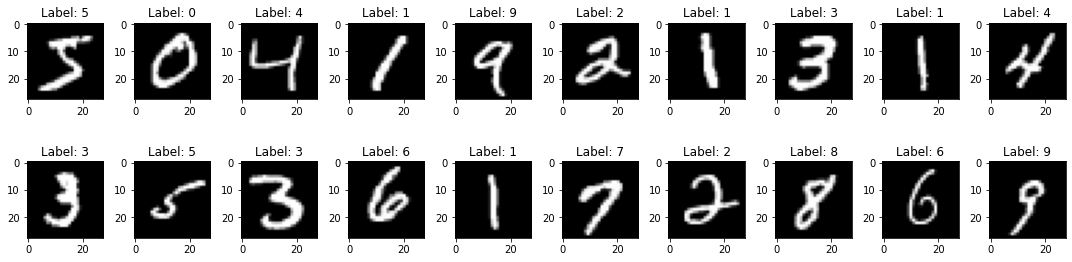

In [3]:
# Show a preview of the first 20 images
num = 20
images = X_train[:num]
labels = y_train[:num]
num_row = 2
num_col = 10
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()


# Prepare the data for training with Keras
The preparation process include the 
* **Reshaping the training data:** The rehaping enables the addition of the greyscale flag to the training dataset. This transforms the dataset into a shape that can be fed into the CNN
* **Normalizing the training data:** The normalization is to convert the pixels into a particular interval. This is imperatrive for improving the model accuracy.
* **One-hot encoding the labels:** This is done on the labels for the CNN to learn properly from the labels. The one-hot-encoding makes the labels to be more expressive and easy to be learnt by the algorithm.

In [4]:
# Reshape arrays to add greyscale flag.
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalizing the training data
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# One-hot encode the data for each label.
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
X_train.shape

(60000, 28, 28, 1)

# Split the datasets

In [6]:
# Split the training and validation datasets and their labels.
from sklearn.model_selection import train_test_split

# Split the training and validation datasets and their labels.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 0)

print(f'Training features:         {X_train.shape}')
print(f'Validation features:       {X_val.shape}')
print(f'Training labels:           {y_train.shape}')
print(f'Validation labels:         {y_val.shape}')

Training features:         (45000, 28, 28, 1)
Validation features:       (15000, 28, 28, 1)
Training labels:           (45000, 10)
Validation labels:         (15000, 10)


# Build the CNN structure

In [8]:
#_________________________________________________________________________________________

num_classes = 10
input_shape = (28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),                           # Input layer 
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # A 3x3 filter with a relu activation
        layers.MaxPooling2D(pool_size=(2, 2)),                    # First pooling layer with 2x2 size.
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), # 
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),                                      # Drop out is applied to control overfitting
        layers.Dense(num_classes, activation="softmax"),          # Softmax activation function is applied at the output layer because of the multi-class
                                                                  #
    ]
)

#cnn.summary()

# Compile the model and summarize the layers

In [9]:
# Compile the model.
#   - Use the adam optimizer.
#   - Use categorical_crossentropy for the loss function.
#   - Use accuracy to measure model performance.

model.compile(optimizer = 'adam',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])


# Summarize the layers.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

# Train the model

In [ ]:
# Train the model over 15 epochs.
model_trained = model.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 15,
                      verbose = 1)

Epoch 1/15
1407/1407 [==============================] - 45s 31ms/step - loss: 0.5123 - accuracy: 0.8427 - val_loss: 0.0850 - val_accuracy: 0.9737
Epoch 2/15
1407/1407 [==============================] - 40s 28ms/step - loss: 0.0964 - accuracy: 0.9696 - val_loss: 0.0603 - val_accuracy: 0.9814
Epoch 3/15
1407/1407 [==============================] - 39s 27ms/step - loss: 0.0776 - accuracy: 0.9756 - val_loss: 0.0472 - val_accuracy: 0.9853
Epoch 4/15
1407/1407 [==============================] - 40s 28ms/step - loss: 0.0582 - accuracy: 0.9815 - val_loss: 0.0405 - val_accuracy: 0.9875
Epoch 5/15
1407/1407 [==============================] - 37s 27ms/step - loss: 0.0520 - accuracy: 0.9846 - val_loss: 0.0380 - val_accuracy: 0.9873
Epoch 6/15
1407/1407 [==============================] - 38s 27ms/step - loss: 0.0458 - accuracy: 0.9851 - val_loss: 0.0404 - val_accuracy: 0.9872
Epoch 7/15
1407/1407 [==============================] - 37s 27ms/step - loss: 0.0424 - accuracy: 0.9861 - val_loss: 0.0341 -

# Evaluate the model on the test data

In [11]:
# Evaluate the model on the test data, showing loss and accuracy.
eval_test = model.evaluate(X_test, y_test, verbose = 0)

print('Loss: {}'.format(round(eval_test[0], 2)))
print('Accuracy: {:.0f}%'.format(eval_test[1] * 100))

Loss: 0.03
Accuracy: 99%


# Make predictions on the test data

In [12]:
# Make predictions on the test data.

prediction = model.predict(X_test)
prediction = np.argmax(np.round(prediction), axis = 1)  # Extract class number from one-hot-encoded array.
actual = np.argmax(np.round(y_test), axis = 1)


# Show the first 30 examples.
print('Actual class:    {}'.format(actual[:10]))
print('Predicted class: {}'.format(prediction[:10]))


Actual class:    [7 2 1 0 4 1 4 9 5 9]
Predicted class: [7 2 1 0 4 1 4 9 5 9]


# Visualize the predictions for 30 examples

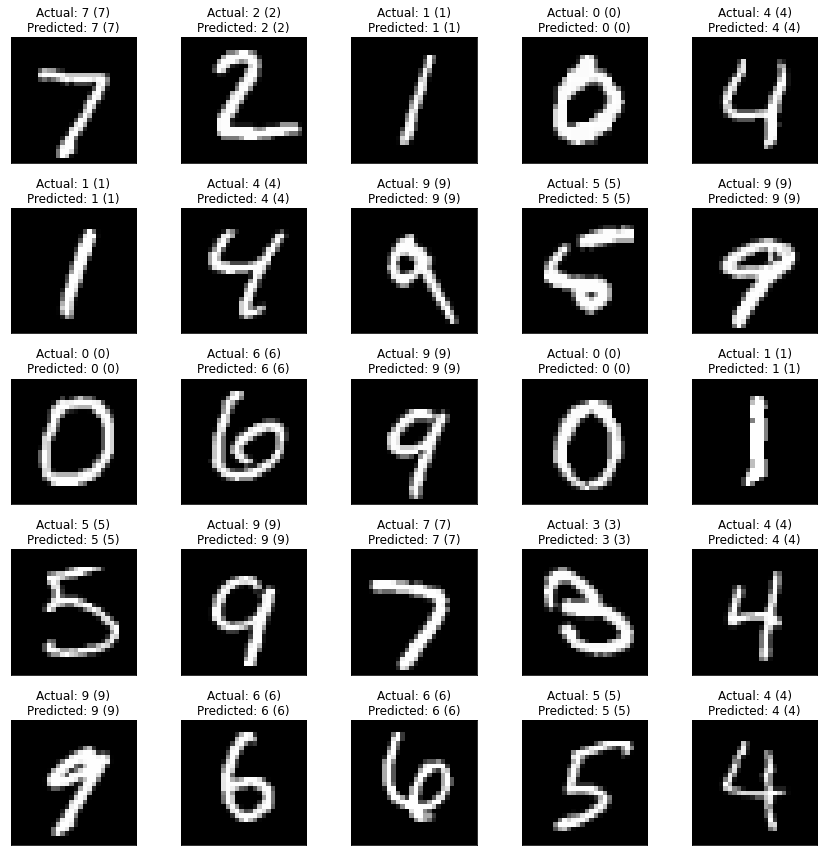

In [13]:
# Using the test set, show the first 30 predictions, highlighting any incorrect predictions in color.
class_names=[0,1,2,3,4,5,6,7,8,9]
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (12, 12))

for i, ax in zip(range(25), axes.flatten()):
    
    if actual[i] == prediction[i]:
        ax.imshow(X_test[i].reshape(28, 28), cmap = 'gray')
    else:
        ax.imshow(X_test[i].reshape(28, 28))  # Highlight wrong predictions.
        
    ax.title.set_text('Actual: {} ({})\nPredicted: {} ({})'.format(class_names[actual[i]], actual[i],
                                                                   class_names[prediction[i]], prediction[i]))

# Turn off axis ticks for readability.
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.tight_layout()

# CONCLUSION
This model had an accuracy of 99% which is encouraging.<br>
My future will involve a more intense and detailed explanations of the concepts<br>

## Reference
* [Keras](https://keras.io/examples/vision/image_classification_from_scratch/)
* [Machine learning mastery](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/)
